In [15]:
import pandas as pd
df = pd.read_csv("toy_tokens.csv", index_col=0)
df.head()

,bswac_head_pp,cnrwac_head_pp,hrwac_head_pp,srwac_head_pp
kuća,2116.0,2832.0,1805.0,1815.0
invest,17.0,132.0,3.0,17.0
član,2696.0,6963.0,2270.0,3375.0
i,703047.0,1430168.0,691190.0,719532.0
osnivač,332.0,1180.0,234.0,476.0


Let's calculate the normalized frequencies in the corpus as per the formula [here](https://www.sketchengine.eu/documentation/simple-maths/)

In [16]:
for column in df.columns:
    new_column_name = column + "_f"
    corpus_size = df[column].sum()
    df[new_column_name] = df[column] * 1e6 / corpus_size

Let's start with CR-SR combination

In [25]:
N = 1

df["HR_SR"] = (df["hrwac_head_pp_f"] + N ) / (df["srwac_head_pp_f"] + N)
df["SR_HR"] = (df["srwac_head_pp_f"] + N ) / (df["hrwac_head_pp_f"] + N)

df["HR_CNR"] = (df["hrwac_head_pp_f"] + N ) / (df["cnrwac_head_pp_f"] + N)
df["CNR_HR"] = (df["cnrwac_head_pp_f"] + N ) / (df["hrwac_head_pp_f"] + N)

df["HR_BS"] = (df["hrwac_head_pp_f"] + N ) / (df["bswac_head_pp_f"] + N)
df["BS_HR"] = (df["bswac_head_pp_f"] + N ) / (df["hrwac_head_pp_f"] + N)

df["BS_SR"] = (df["bswac_head_pp_f"] + N ) / (df["srwac_head_pp_f"] + N)
df["SR_BS"] = (df["srwac_head_pp_f"] + N ) / (df["bswac_head_pp_f"] + N)

df["BS_CNR"] = (df["bswac_head_pp_f"] + N ) / (df["cnrwac_head_pp_f"] + N)
df["CNR_BS"] = (df["cnrwac_head_pp_f"] + N ) / (df["bswac_head_pp_f"] + N)

df["CNR_SR"] = (df["cnrwac_head_pp_f"] + N ) / (df["srwac_head_pp_f"] + N)
df["SR_CNR"] = (df["srwac_head_pp_f"] + N ) / (df["cnrwac_head_pp_f"] + N)


In [20]:
print(df.loc[:, [ "HR_SR", "SR_HR",]].sort_values(by="HR_SR", ascending=False).head(30).to_markdown())

|              |    HR_SR |      SR_HR |
|:-------------|---------:|-----------:|
| kn           | 179.556  | 0.0055693  |
| sustav       | 150.153  | 0.00665988 |
| sustava      | 149.265  | 0.00669948 |
| suradnji     | 125.406  | 0.00797411 |
| natjecanja   | 115.761  | 0.0086385  |
| lipnja       | 110.973  | 0.00901122 |
| rujna        | 110.86   | 0.00902038 |
| okoliša      | 110.521  | 0.00904808 |
| tvrtke       | 109.443  | 0.00913722 |
| svibnja      | 109.307  | 0.00914858 |
| ožujka       | 109.117  | 0.00916446 |
| travnja      | 107.848  | 0.00927227 |
| udruge       | 105.651  | 0.00946512 |
| listopada    | 103.449  | 0.0096666  |
| uvjetima     |  84.6988 | 0.0118065  |
| veljače      |  84.0536 | 0.0118972  |
| gospodarstva |  82.3719 | 0.0121401  |
| sudionika    |  81.2523 | 0.0123073  |
| primjerice   |  80.2788 | 0.0124566  |
| udruga       |  80.1087 | 0.012483   |
| tjedna       |  78.8446 | 0.0126832  |
| kuna         |  78.6973 | 0.0127069  |
| županije     |

In [18]:
print(df.loc[:, [ "SR_HR", "HR_SR",]].sort_values(by="SR_HR", ascending=False).head(30).to_markdown())

|             |   SR_HR |      HR_SR |
|:------------|--------:|-----------:|
| rešenja     | 203.882 | 0.0049048  |
| odsto       | 195.017 | 0.00512775 |
| opštine     | 193.647 | 0.00516403 |
| preduzeća   | 186.179 | 0.00537119 |
| gde         | 167.978 | 0.00595317 |
| deo         | 164.964 | 0.00606195 |
| cena        | 164.217 | 0.00608949 |
| mesta       | 163.866 | 0.00610255 |
| cene        | 163.412 | 0.00611949 |
| evra        | 157.018 | 0.00636869 |
| časova      | 155.753 | 0.00642043 |
| predsednika | 154.401 | 0.00647663 |
| saradnji    | 152.997 | 0.00653608 |
| vreme       | 139.484 | 0.00716929 |
| meseca      | 138.417 | 0.00722453 |
| predsednik  | 134.998 | 0.00740753 |
| dece        | 132.495 | 0.00754746 |
| meseci      | 125.721 | 0.00795413 |
| uslovima    | 124.393 | 0.00803905 |
| uvek        | 122.46  | 0.00816596 |
| delu        | 121.249 | 0.00824752 |
| posle       | 119.203 | 0.00838903 |
| dve         | 117.117 | 0.00853847 |
| korišćenje  | 114.489 |

Let's inspect the distribution of the token importances:

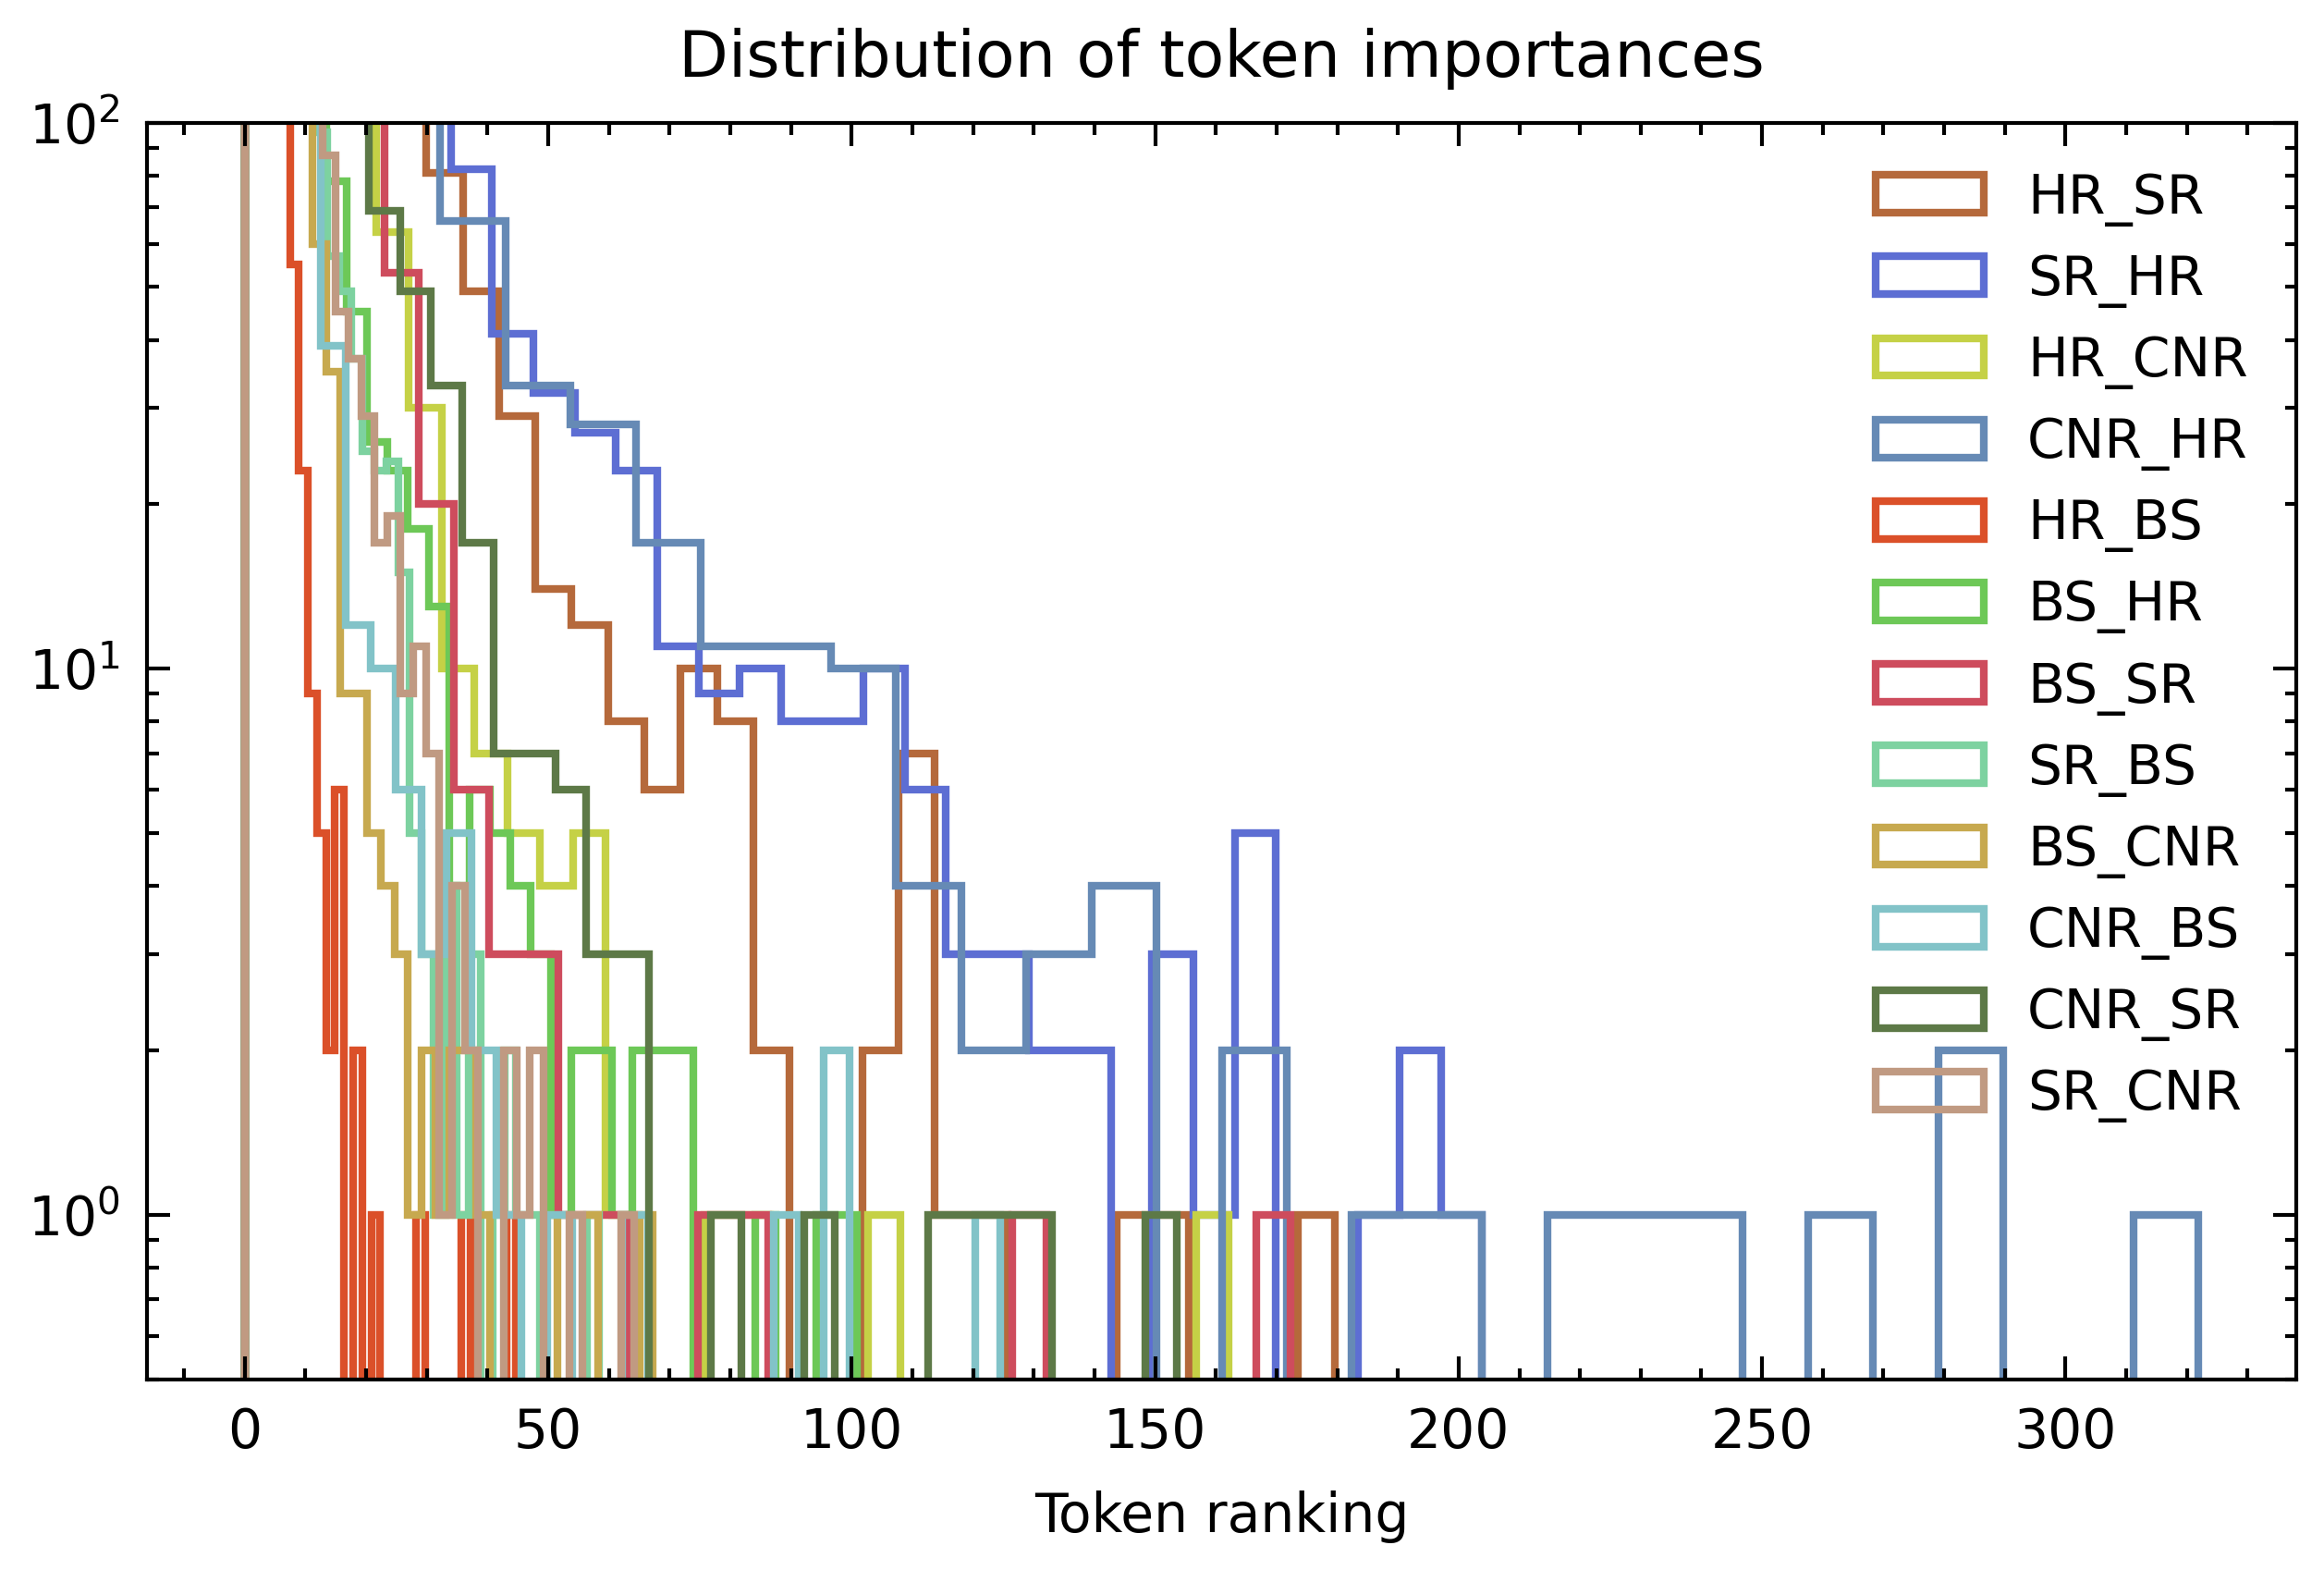

In [57]:
import matplotlib.pyplot as plt
colors = ["#b5693b",
"#5d6ed3",
"#c5d146",
"#668ab5",
"#db5029",
"#6dc857",
"#ce4c5d",
"#7dd2a0",
"#c7a94f",
"#82c3c8",
"#5d7947",
"#c09a82"]
plt.figure(figsize=(5, 3))
plt.style.use(["science", "no-latex"])
for col, color in zip(['HR_SR', 'SR_HR', 'HR_CNR', 'CNR_HR', 'HR_BS', 'BS_HR', 'BS_SR', 'SR_BS', 'BS_CNR', 'CNR_BS', 'CNR_SR', 'SR_CNR'], colors):
    plt.hist(df[col], bins=30, histtype="step", label=col, color=color, )
plt.semilogy()
plt.legend()
plt.ylim(0.5, 1e2)
plt.title("Distribution of token importances")
plt.xlabel("Token ranking")
plt.savefig("images/distribution_of_token_importances.png")
plt.show()

In [32]:
print(df.loc[:, [ "CNR_HR"]].sort_values(by="CNR_HR", ascending=False).head(30).to_markdown())

|              |   CNR_HR |
|:-------------|---------:|
| saradnji     |  321.932 |
| saradnje     |  285.999 |
| odsto        |  285.678 |
| saopšteno    |  268.147 |
| opštine      |  237.49  |
| saopštenju   |  232.406 |
| bezbjednosti |  224.586 |
| saopštio     |  193.805 |
| saradnju     |  190.477 |
| nijesu       |  170.979 |
| časova       |  168.239 |
| organizuje   |  147.063 |
| preduzeća    |  145.937 |
| bezbjednost  |  143.265 |
| saobraćaja   |  142.845 |
| sjutra       |  136.764 |
| decembra     |  131.817 |
| uslova       |  129.833 |
| juče         |  128.533 |
| finansiranje |  128.219 |
| opština      |  116.649 |
| regiona      |  114.482 |
| saradnja     |  113.346 |
| crnogorskih  |  113.314 |
| staranja     |  106.408 |
| uslove       |  105.805 |
| uslovima     |  103.699 |
| crnogorske   |  103.566 |
| tužilaštva   |  103.347 |
| jula         |  101.67  |
